# Lab 5 - Ensembles 
Here is what we will do:
1. Create a data set with two input features and a 3 category target
2. Train a decision tree on the data set for a baseline
3. Train 3 ensemble models
    - Serial Ada Boosted DT
    - Decision Forest
    - Ensemble of DT, SVM, and NN
3. Get model performance on train and test sets
4. Create appropriate graphs
5. Do a 10 fold cross validation with 

### Prepare the data

### Train and evaluate ADA boosted model

### Settings for the generated dataset
This data set will be spirals with noise
arms - This is the number of categories we will have
turns - How many times we go around the spiral
width - How wide is the spiral (percentage of the radius)
noise - How much noise we will add to the data.
size - The number of points to generate

In [2]:
arms = 3
turns = 1.5
width = 0.3
noise = .25
size = 4000

### The spirals will be based on the equation r=theta

Build set
Arm 0
Using offset 0.0
Arm 1
Using offset 2.0943951023931953
Arm 2
Using offset 4.1887902047863905


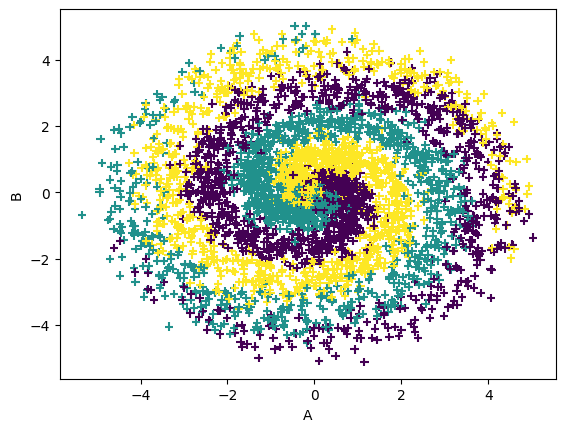

In [21]:
import numpy as np
import pandas as pd

def build_arm(n):
    print("Arm", n)
    points_per_arm = int(size/arms)
    #Get points on the curve
    theta_values = np.random.uniform(0, np.pi*turns, points_per_arm)
    r_values = theta_values
    target_values = [n] * points_per_arm

    #Add make the arm wider
    lower_fraction = (1 - width)*theta_values
    upper_fraction = (1 + width)*theta_values
    difference = upper_fraction - lower_fraction
    location = np.random.uniform(0, 1, points_per_arm)
    theta_values = theta_values + lower_fraction + difference*location

    #offset angle 
    offset = n*2*np.pi/arms
    print('Using offset', offset)
    theta_values = theta_values + offset

    #draw the noise from a distribution centered on 0.0 with a standard deviation of noise
    x_noise_values = np.random.normal(0, noise, points_per_arm)
    y_noise_values = np.random.normal(0, noise, points_per_arm)
    x_values = r_values * np.sin(theta_values) + x_noise_values
    y_values = r_values * np.cos(theta_values) + y_noise_values
    return x_values, y_values, target_values

def build_set():
    data_x = np.array([])
    data_y = np.array([])
    data_t = np.array([])
    print("Build set")
    for i in range(0,arms):
        x, y, t = build_arm(i)
        # print(data_x)
        # print(x)
        # print(y)
        # print(t)
        # add each arm to the data set
        data_x=np.append(data_x, x)
        data_y=np.append(data_y, y)
        data_t=np.append(data_t, t)
    # create a dictionary with each feature
    d = {}
    d["A"] = data_x
    d["B"] = data_y
    d["Class"] = data_t

    #print(d)

    # Create the data frame from the dictionary
    dataframe = pd.DataFrame(data=d)
    return dataframe

spiral = build_set()

import matplotlib.pyplot as plt

#shuffle before plotting so we don't always overwrite with the same color
shuffled = spiral.sample(frac=1)
plt.scatter(shuffled['A'], shuffled['B'], c=shuffled['Class'], marker='+')

plt.xlabel('A')
plt.ylabel('B')
plt.show()

### Stratified Test/Train Data Split

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(spiral, spiral['Class']):
    train_set = spiral.iloc[train_indices]
    test_set = spiral.iloc[test_indices]

### Train and evaluate Decision Tree model 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Results:')
print(fmt.format('Accuracy:', round(accuracy_score(y, y_pred)*100, 2)))
print(fmt.format('Precision:', round(precision_score(y, y_pred, average='weighted')*100, 2)))
print(fmt.format('Recall:', round(recall_score(y,y_pred, average='weighted')*100, 2)))
print(fmt.format('F1:', round(f1_score(y, y_pred, average='weighted')*100, 2)))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Results:')
print(fmt.format('Accuracy:', round(accuracy_score(y, y_pred)*100, 2)))
print(fmt.format('Precision:', round(precision_score(y, y_pred, average='weighted')*100, 2)))
print(fmt.format('Recall:', round(recall_score(y,y_pred, average='weighted')*100, 2)))
print(fmt.format('F1:', round(f1_score(y, y_pred, average='weighted')*100, 2)))

Results for decision tree on training data
  Default settings
Confusion Matrix
[[1067    0    0]
 [   0 1066    0]
 [   0    0 1066]]
Results:
Accuracy:     100.0
Precision:    100.0
Recall:       100.0
F1:           100.0

Results for decision tree on test data
  Default settings
Confusion Matrix
[[198  33  35]
 [ 37 201  29]
 [ 34  43 190]]
Results:
Accuracy:     100.0
Precision:    100.0
Recall:       100.0
F1:           100.0


### Train and evaluate SVC model 

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Results:')
print(fmt.format('Accuracy:', round(accuracy_score(y, y_pred)*100, 2)))
print(fmt.format('Precision:', round(precision_score(y, y_pred, average='weighted')*100, 2)))
print(fmt.format('Recall:', round(recall_score(y,y_pred, average='weighted')*100, 2)))
print(fmt.format('F1:', round(f1_score(y, y_pred, average='weighted')*100, 2)))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Results:')
print(fmt.format('Accuracy:', round(accuracy_score(y, y_pred)*100, 2)))
print(fmt.format('Precision:', round(precision_score(y, y_pred, average='weighted')*100, 2)))
print(fmt.format('Recall:', round(recall_score(y,y_pred, average='weighted')*100, 2)))
print(fmt.format('F1:', round(f1_score(y, y_pred, average='weighted')*100, 2)))

Results for svc on training data
  Default settings
Confusion Matrix
[[812 125 130]
 [177 762 127]
 [171 142 753]]
Results:
Accuracy:     72.74
Precision:    72.87
Recall:       72.74
F1:           72.74

Results for svc on test data
  Default settings
Confusion Matrix
[[206  35  25]
 [ 62 177  28]
 [ 43  40 184]]
Results:
Accuracy:     72.74
Precision:    72.87
Recall:       72.74
F1:           72.74


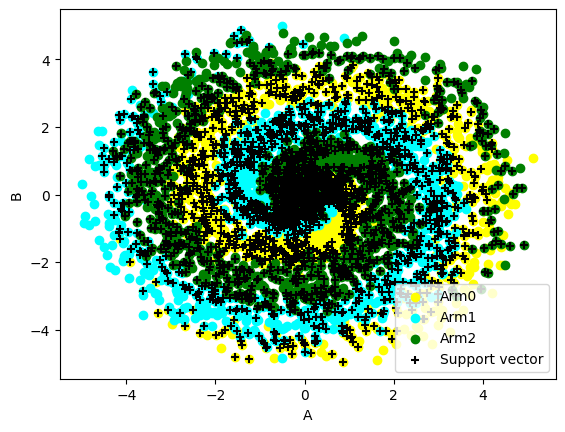

In [11]:
import matplotlib.pyplot as plt
arm0_A = np.ma.masked_where(spiral['Class']!=0, spiral['A'])
arm1_A = np.ma.masked_where(spiral['Class']!=1, spiral['A'])
arm2_A = np.ma.masked_where(spiral['Class']!=2, spiral['A'])

# get the values for the support vectors (the special instances)
support_x = [x for (x,y) in svc_model.support_vectors_]
support_y = [y for (x,y) in svc_model.support_vectors_]

b = spiral['B']
plt.scatter(arm0_A, b, c='yellow', marker='o')
plt.scatter(arm1_A, b, c='cyan', marker='o')
plt.scatter(arm2_A, b, c='green', marker='o')
plt.scatter(support_x, support_y, c='black', marker='+')

plt.xlabel('A')
plt.ylabel('B')
plt.legend(['Arm0', 'Arm1', 'Arm2','Support vector'])
plt.show()

### Train and evaluate Neural Net model 

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10), solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for NN on train data
  Default settings
Confusion Matrix
[[911  74  82]
 [ 78 896  92]
 [ 80  84 902]]
Accuracy is   0.8468271334792122
Precision is  0.8468627203061284
Recall is     0.8468271334792122
F1 is         0.8468295355167541

Results for NN on test data
  Default settings
Confusion Matrix
[[218  26  22]
 [ 26 216  25]
 [ 20  17 230]]
Accuracy is   0.83
Precision is  0.8300251009073211
Recall is     0.83
F1 is         0.8298498392945313


C:\Users\mrpog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Results
Basic results for our classification model to predict arm on the spiral data set

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|A,B|100.0|100.0|71.62 | 71.63 |
|SVC|A,B|71.58|71.58|70.5|70.42|
|MLP|A,B layers (50,25,10) lbfgs|80.06|80.13|77.87|77.91